# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [ ]:
# 2. Load Dataset
df = pd.read_csv("bank_transactions_data_2.csv")
df_original = df.copy()

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [ ]:
print("Jumlah baris dan kolom:", df.shape)
print("Tipe data tiap kolom:")
print(df.dtypes)

Jumlah baris dan kolom: (2512, 16)
Tipe data tiap kolom:
TransactionID               object
AccountID                   object
TransactionAmount          float64
TransactionDate             object
TransactionType             object
Location                    object
DeviceID                    object
IP Address                  object
MerchantID                  object
Channel                     object
CustomerAge                  int64
CustomerOccupation          object
TransactionDuration          int64
LoginAttempts                int64
AccountBalance             float64
PreviousTransactionDate     object
dtype: object


In [ ]:
# Cek data unik
for col in df.columns:
    if df[col].nunique() == df.shape[0]:
        print(f"Kolom {col} kemungkinan merupakan ID unik dan akan dihapus.")

Kolom TransactionID kemungkinan merupakan ID unik dan akan dihapus.
Kolom TransactionDate kemungkinan merupakan ID unik dan akan dihapus.


In [ ]:
# Hapus kolom ID unik
df = df.drop(columns=['TransactionID', 'AccountID', 'CustomerID', 'MerchantID', 'DeviceID', 'IP Address'], errors='ignore')

In [ ]:
# Cek missing values
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64


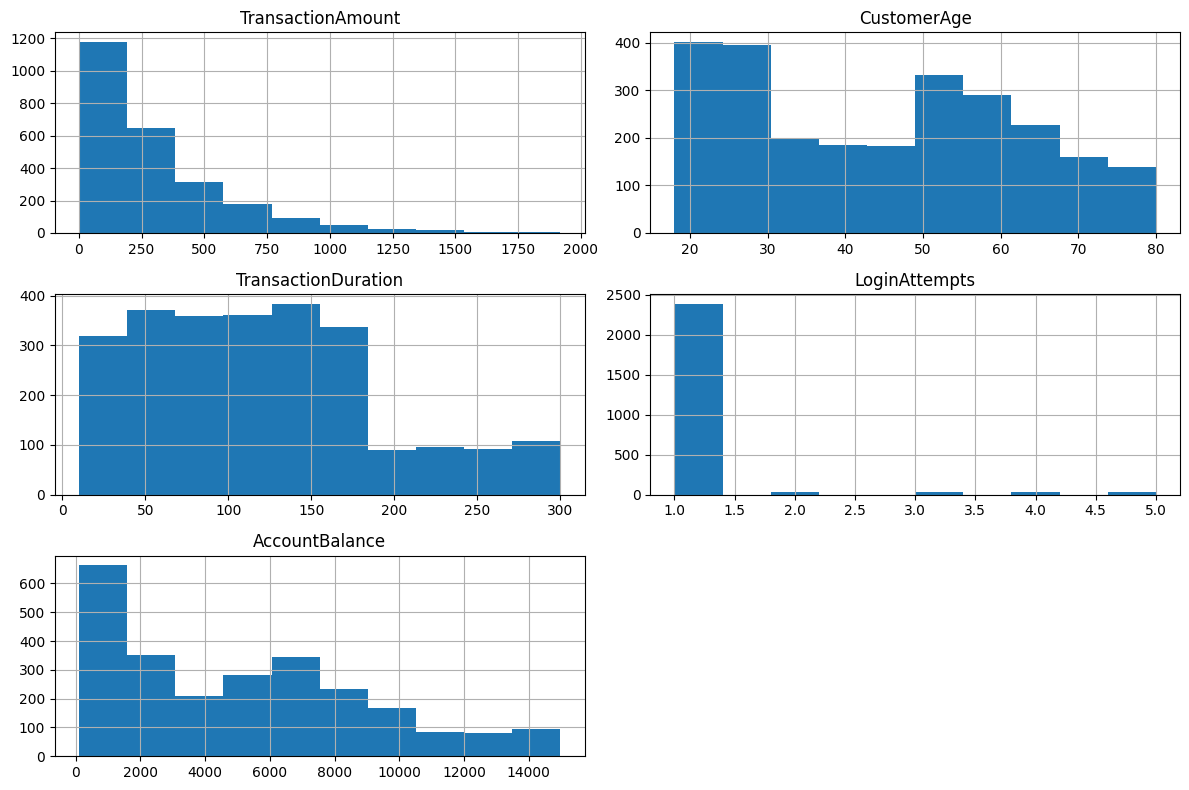

In [ ]:
# Visualisasi distribusi numerik
num_cols = df.select_dtypes(include='number').columns
cat_cols = df.select_dtypes(include='object').columns

df[num_cols].hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

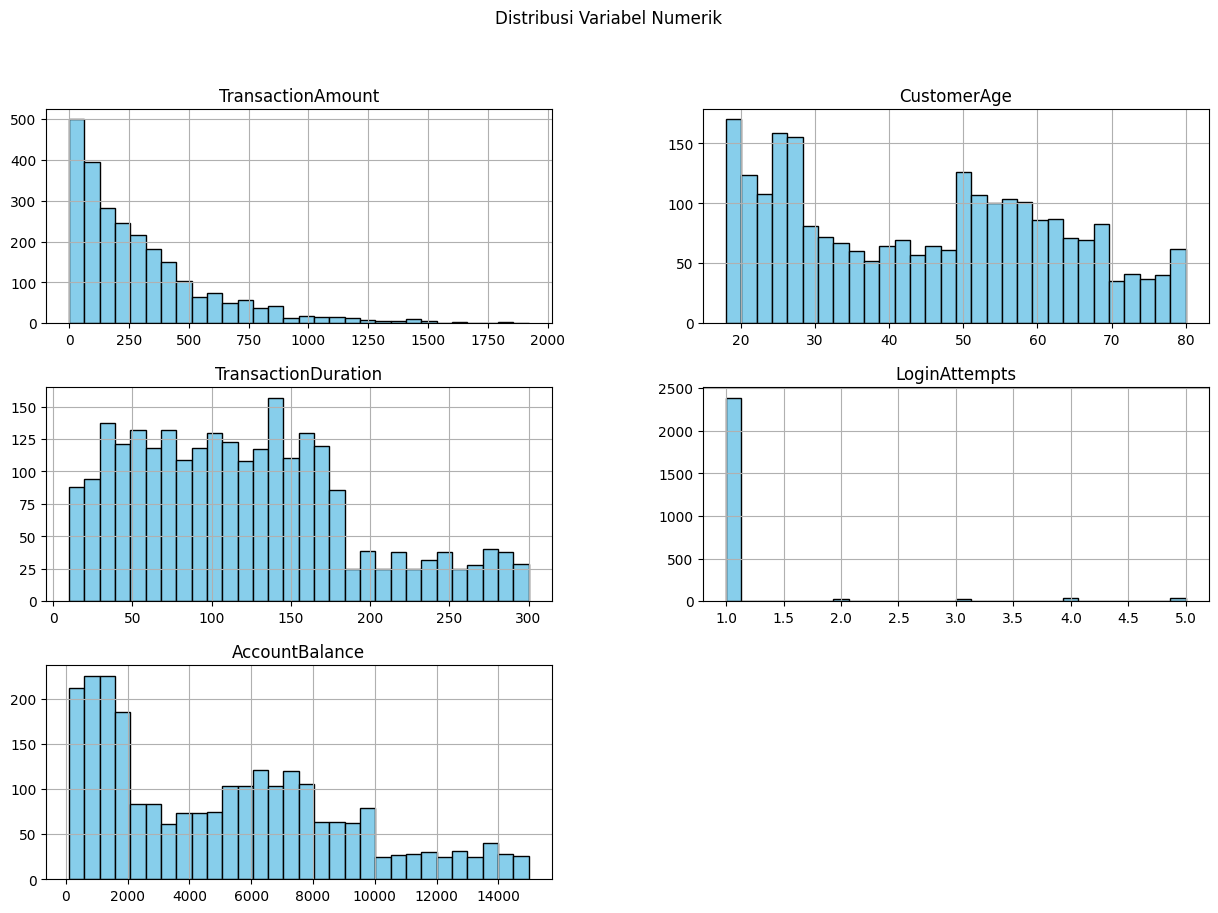

In [ ]:
# Histogram untuk kolom numerik
df[num_cols].hist(bins=30, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle("Distribusi Variabel Numerik")
plt.show()

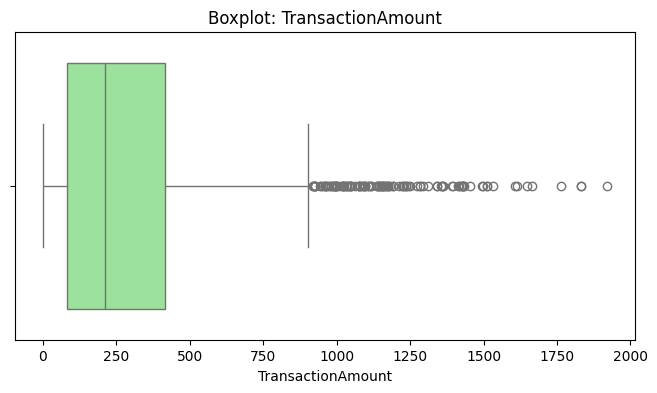

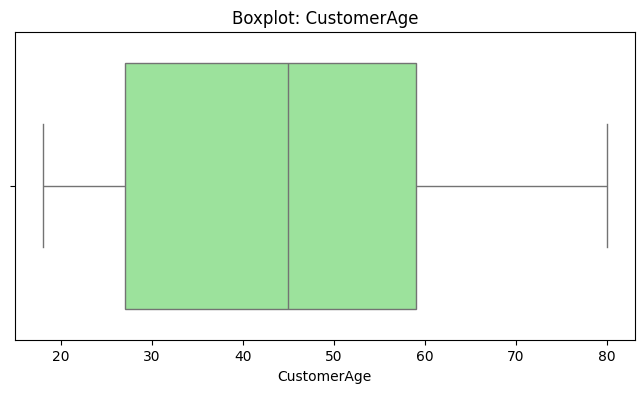

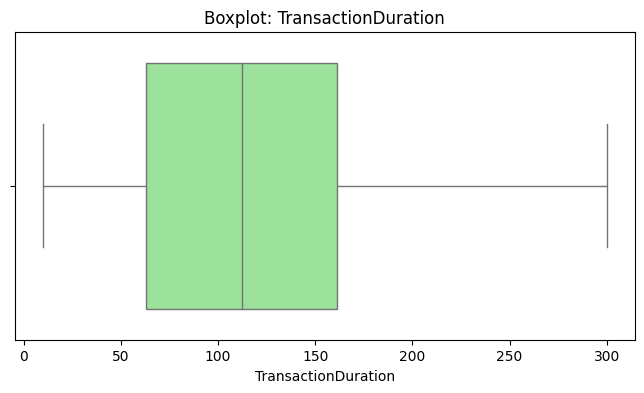

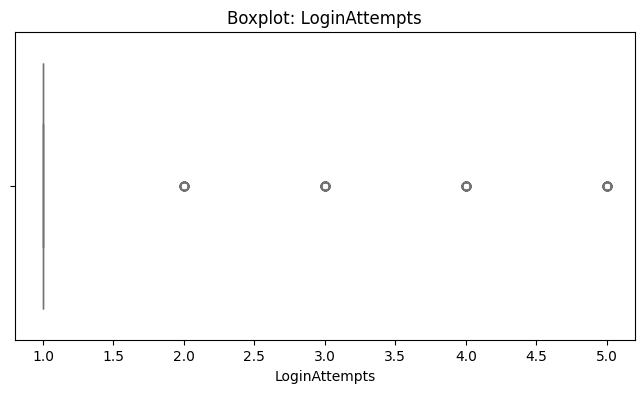

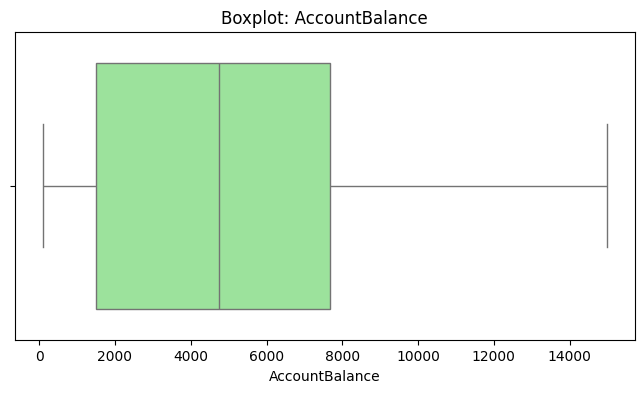

In [ ]:
# Boxplot untuk mendeteksi outlier
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x=col, color='lightgreen')
    plt.title(f"Boxplot: {col}")
    plt.show()

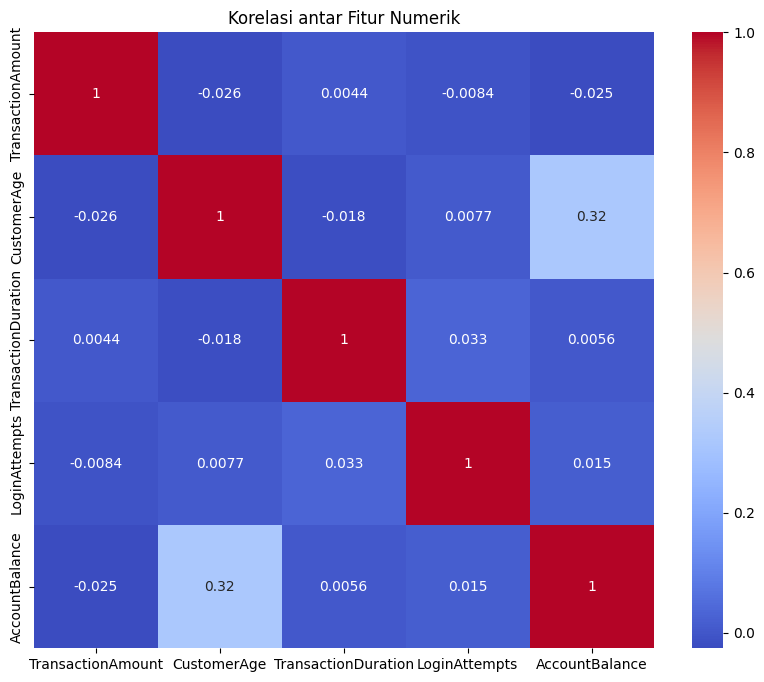

In [ ]:
# Korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Korelasi antar Fitur Numerik")
plt.show()

In [ ]:
# Cek jumlah unique values pada setiap kolom kategorikal
for col in cat_cols:
    unique_vals = df[col].nunique()
    print(f"{col}: {unique_vals} unique values")

TransactionDate: 2512 unique values
TransactionType: 2 unique values
Location: 43 unique values
Channel: 3 unique values
CustomerOccupation: 4 unique values
PreviousTransactionDate: 360 unique values


<ipython-input-77-b4812b358fb3>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')


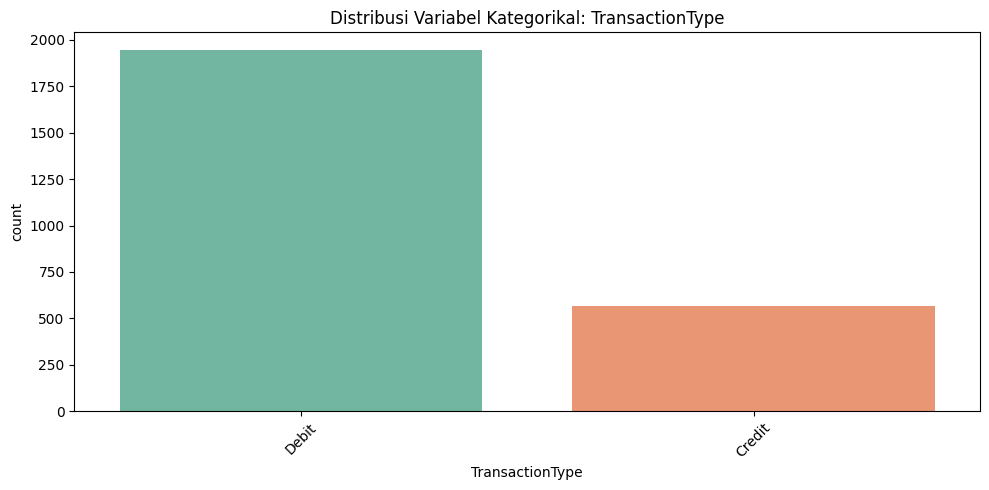

<ipython-input-77-b4812b358fb3>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')


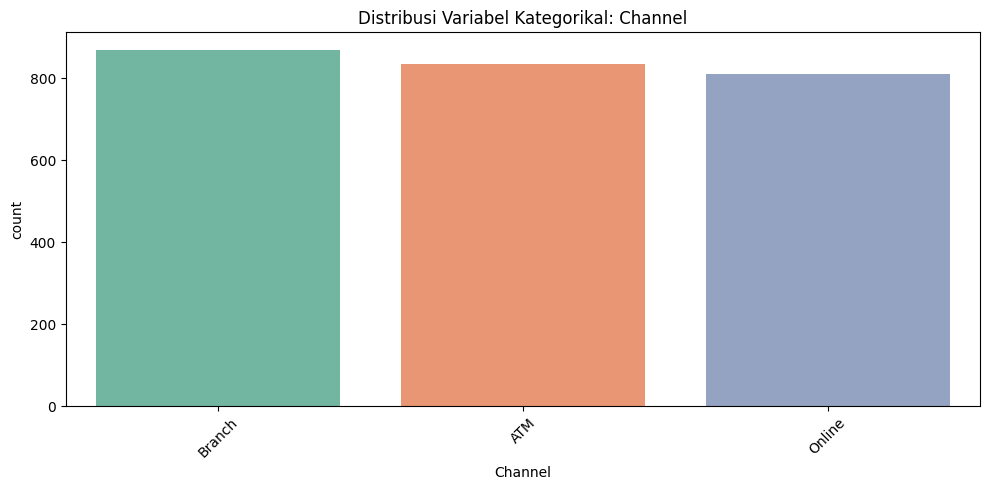

<ipython-input-77-b4812b358fb3>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')


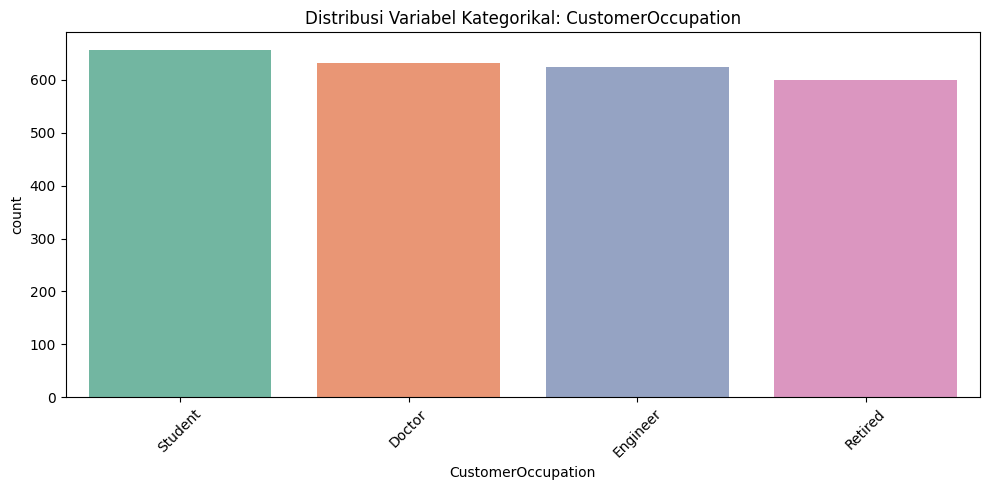

In [ ]:
# Visualisasi hanya kolom kategorikal yang jumlah uniknya sedikit (< 30)
for col in cat_cols:
    if df[col].nunique() < 30:  # Bisa disesuaikan misal 50
        plt.figure(figsize=(10, 5))
        sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')
        plt.title(f"Distribusi Variabel Kategorikal: {col}")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

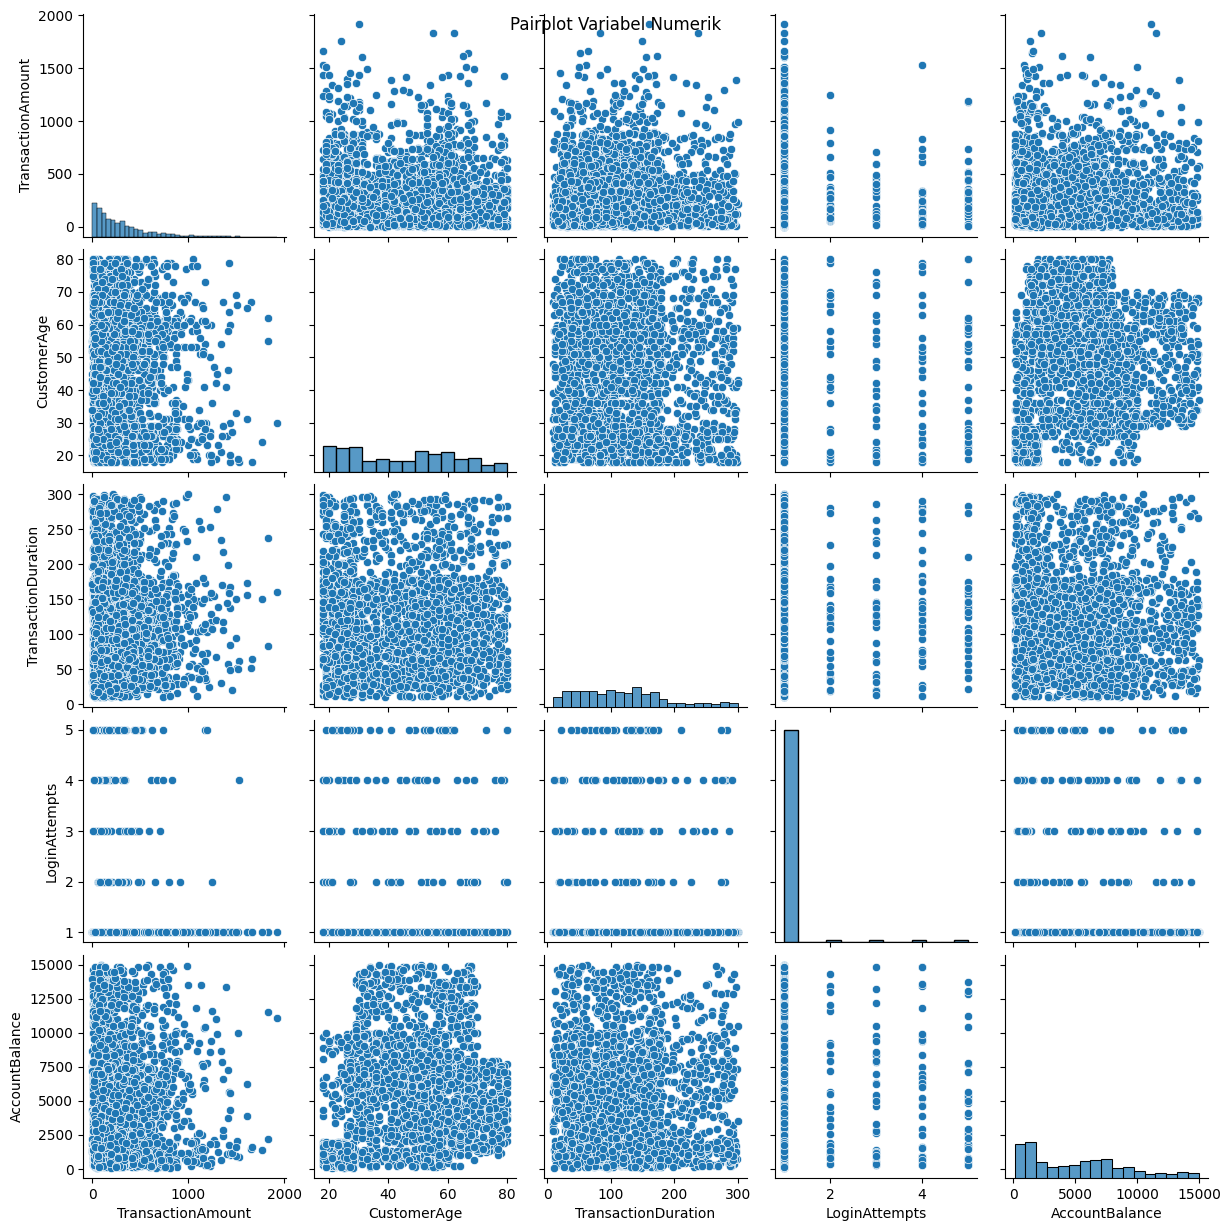

In [ ]:
# Pairplot (jika jumlah kolom numerik tidak terlalu banyak)
if len(num_cols) <= 5:
    sns.pairplot(df[num_cols])
    plt.suptitle("Pairplot Variabel Numerik")
    plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [ ]:
df = df.dropna()

In [ ]:
# Hapus Data Duplikat
print("\nJumlah Duplikat:", df.duplicated().sum())
df = df.drop_duplicates()


Jumlah Duplikat: 0


In [ ]:
# Standarisasi/Normalisasi Fitur Numerik
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [ ]:
# Scaling numerikal
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[num_cols])

In [ ]:
# Encoding Fitur Kategorikal
from sklearn.preprocessing import StandardScaler, LabelEncoder
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [ ]:
# Deteksi & Penanganan Outlier
# Menggunakan IQR untuk deteksi outlier numerik
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = ((df[col] < lower) | (df[col] > upper)).sum()
    print(f"Outlier di {col}: {outliers} nilai")

Outlier di TransactionAmount: 113 nilai
Outlier di CustomerAge: 0 nilai
Outlier di TransactionDuration: 0 nilai
Outlier di LoginAttempts: 122 nilai
Outlier di AccountBalance: 0 nilai


In [ ]:
# Encoding kategorikal
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [ ]:
# Binning umur
if 'CustomerAge' in df.columns:
    df['AgeGroup'] = pd.cut(df['CustomerAge'], bins=[0, 25, 40, 60, 100],
                            labels=['Muda', 'Dewasa Awal', 'Dewasa', 'Lansia'])
    le = LabelEncoder()
    df['AgeGroup'] = le.fit_transform(df['AgeGroup'].astype(str))
    label_encoders['AgeGroup'] = le

In [ ]:
# Cek Hasil Akhir
print("\nData setelah preprocessing:")
print(df.head())


Data setelah preprocessing:
   TransactionAmount  TransactionDate  TransactionType  Location  Channel  \
0          -0.971275              684                1        36        0   
1           0.269440             1192                1        15        0   
2          -0.586882             1276                1        23        2   
3          -0.387456              823                1        33        2   
4          -0.973468             1959                0         1        2   

   CustomerAge  CustomerOccupation  TransactionDuration  LoginAttempts  \
0     1.423718                   0            -0.552443      -0.206794   
1     1.311287                   0             0.305314      -0.206794   
2    -1.443277                   3            -0.909842      -0.206794   
3    -1.049768                   3            -1.353017      -0.206794   
4    -1.049768                   3             1.120184      -0.206794   

   AccountBalance  PreviousTransactionDate  AgeGroup  
0       

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [ ]:
# Model Clustering dengan KMeans
k = 3  # Ganti dengan nilai optimal dari Elbow/Silhouette
model = KMeans(n_clusters=k, random_state=42)
clusters = model.fit_predict(df_scaled)

In [ ]:
# Tambahkan kolom hasil cluster ke dataframe
df['Cluster'] = clusters

In [ ]:
# Cek jumlah data per cluster
print(df['Cluster'].value_counts())

Cluster
0    1094
1     835
2     583
Name: count, dtype: int64


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [ ]:
# 7. Evaluasi Model
silhouette = silhouette_score(df_scaled, clusters)
print(f'Silhouette Score: {silhouette:.4f}')

Silhouette Score: 0.2155


In [ ]:
# Evaluasi Jumlah Cluster Optimal
inertia = []
sil_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_scaled)
    inertia.append(kmeans.inertia_)
    sil = silhouette_score(df_scaled, labels)
    sil_scores.append(sil)

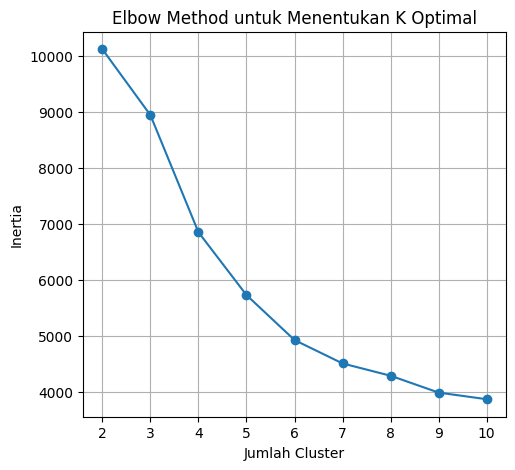

In [ ]:
# Visualisasi Elbow Method
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(k_range, inertia, marker='o')
plt.title("Elbow Method untuk Menentukan K Optimal")
plt.xlabel("Jumlah Cluster")
plt.ylabel("Inertia")
plt.xticks(k_range)
plt.grid(True)

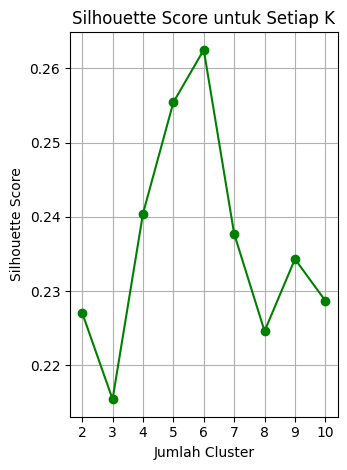

In [ ]:
# Visualisasi Silhouette Score
plt.subplot(1,2,2)
plt.plot(k_range, sil_scores, marker='o', color='green')
plt.title("Silhouette Score untuk Setiap K")
plt.xlabel("Jumlah Cluster")
plt.ylabel("Silhouette Score")
plt.xticks(k_range)
plt.grid(True)
plt.tight_layout()
plt.show()

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [ ]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[num_cols])

In [ ]:
# Apply PCA
pca = PCA()
pca.fit(X_scaled)

PCA()

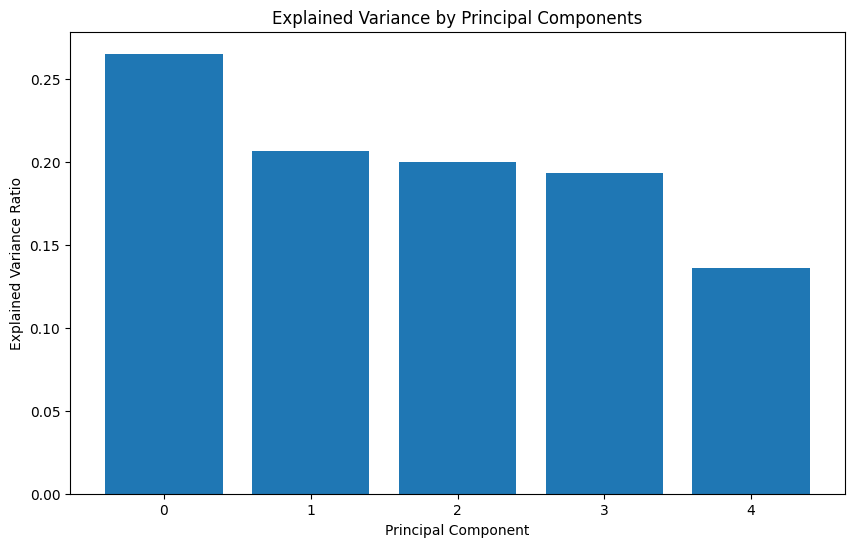

In [ ]:
# Plot explained variance ratio
plt.figure(figsize=(10, 6))
plt.bar(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Components')
plt.show()

In [ ]:
# Select relevant features
selected_features = ['TransactionAmount', 'AccountBalance', 'CustomerAge',
                    'TransactionType', 'Channel', 'TransactionDuration']

In [ ]:
# For datetime features, extract additional features
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['PreviousTransactionDate'] = pd.to_datetime(df['PreviousTransactionDate'])
df['DaysBetweenTransactions'] = (df['TransactionDate'] - df['PreviousTransactionDate']).dt.days

In [ ]:
# Add to selected features
selected_features.append('DaysBetweenTransactions')

In [ ]:
# One-hot encode categorical variables
df_processed = pd.get_dummies(df[selected_features], columns=['TransactionType', 'Channel'])

In [ ]:
# Standardize the data
scaler = StandardScaler()
X_selected = scaler.fit_transform(df_processed)

In [ ]:
# Original clustering with all numerical features
kmeans_original = KMeans(n_clusters=4, random_state=42)
clusters_original = kmeans_original.fit_predict(df[num_cols])

In [ ]:
# Evaluation
silhouette_original = silhouette_score(df[num_cols], clusters_original)
print(f"Original Silhouette Score: {silhouette_original}")

Original Silhouette Score: 0.24044069676383847


In [ ]:
# Clustering with selected features
kmeans_selected = KMeans(n_clusters=4, random_state=42)
clusters_selected = kmeans_selected.fit_predict(X_selected)

In [ ]:
# Evaluation
silhouette_selected = silhouette_score(X_selected, clusters_selected)
print(f"Selected Features Silhouette Score: {silhouette_selected}")

Selected Features Silhouette Score: 0.27264640792585493


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

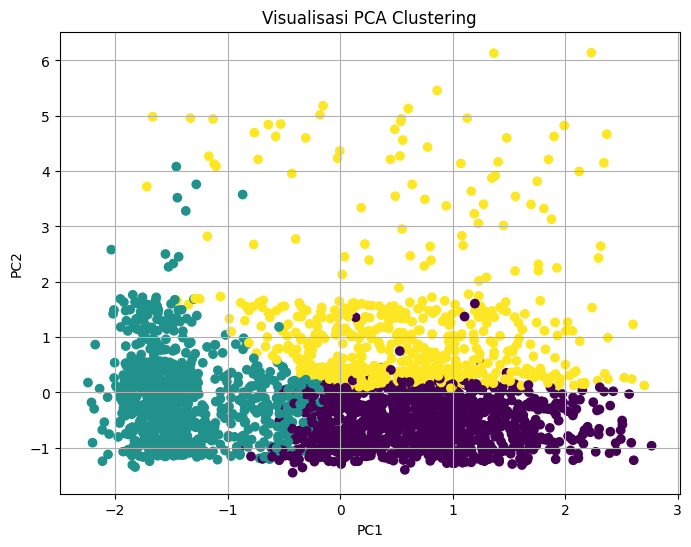

In [ ]:
df_pca = PCA(n_components=2).fit_transform(df_scaled)
plt.figure(figsize=(8,6))
plt.scatter(df_pca[:,0], df_pca[:,1], c=clusters, cmap='viridis')
plt.title('Visualisasi PCA Clustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

In [ ]:
from sklearn.cluster import KMeans

model_kmeans = KMeans(n_clusters=3, random_state=42)
clusters = model_kmeans.fit_predict(df_scaled)

In [ ]:
df_normalized = df[numerical_cols].dropna()
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_normalized)

In [ ]:
df_normalized['Cluster'] = model_kmeans.labels_

In [ ]:
df[numerical_cols] = scaler.inverse_transform(df[numerical_cols])

In [ ]:
# Buat dan latih model clustering
model_kmeans = KMeans(n_clusters=3, random_state=42)
model_kmeans.fit(df_scaled)

KMeans(n_clusters=3, random_state=42)

In [ ]:
print("DataFrame columns:", df_normalized.columns.tolist())
print("Encoder keys:", list(label_encoders.keys()))

DataFrame columns: ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance', 'Cluster']
Encoder keys: ['Fitur']


In [ ]:
# Tambahkan hasil clustering ke DataFrame scaled
df_scaled_df = pd.DataFrame(df_scaled, columns=numerical_cols)
df_scaled_df['Cluster'] = clusters

In [ ]:
# Inverse data numerik kembali ke skala asli
df_original_scale = pd.DataFrame(
    scaler.inverse_transform(df_scaled_df[numerical_cols]),
    columns=numerical_cols
)

In [ ]:
# Tambahkan kembali kolom 'Cluster' ke data asli
df_original_scale['Cluster'] = df_scaled_df['Cluster']

In [ ]:
print(df_original_scale.head())

   TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
0          -0.971275     1.423718            -0.552443      -0.206794   
1           0.269440     1.311287             0.305314      -0.206794   
2          -0.586882    -1.443277            -0.909842      -0.206794   
3          -0.387456    -1.049768            -1.353017      -0.206794   
4          -0.973468    -1.049768             1.120184      -0.206794   

   AccountBalance  Cluster  
0       -0.000537        0  
1        2.216472        0  
2       -1.023534        1  
3        0.885797        0  
4        0.593589        2  


### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [ ]:
numeric_columns = df.select_dtypes(include='number').columns.tolist()

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

df['cluster_label'] = cluster_labels

In [ ]:
df_encoded = pd.get_dummies(df, columns=categorical_cols)

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# Menambahkan kolom cluster ke df_encoded
df_encoded['cluster_label'] = cluster_labels

In [ ]:
print("=== Rata-rata fitur tiap cluster ===")
display(df_encoded.groupby('cluster_label')[num_cols].mean())

=== Rata-rata fitur tiap cluster ===


,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
cluster_label,,,,,
0,0.082952,0.620668,-0.545962,-0.185555,0.391632
1,0.046379,-1.035832,-0.059224,-0.107414,-0.871724
2,-0.222086,0.318884,1.109321,0.502038,0.513627


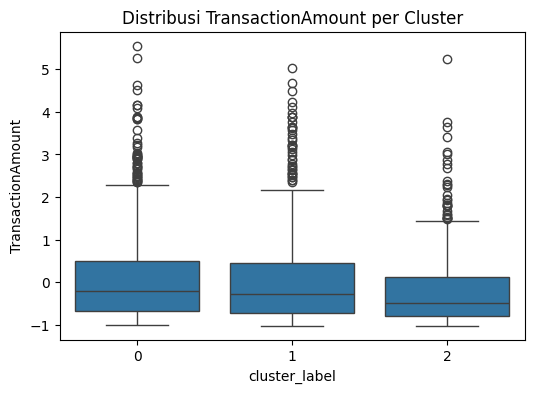

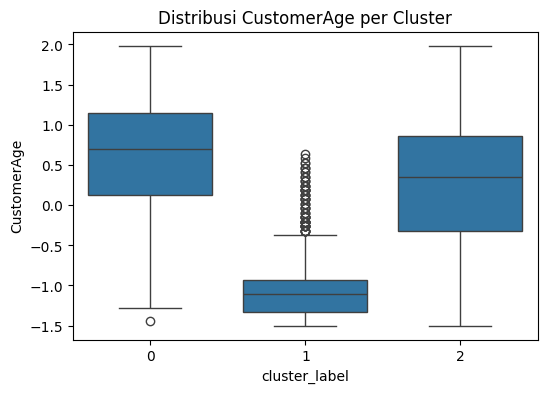

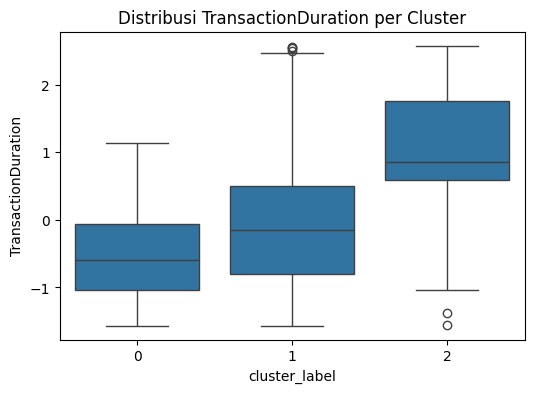

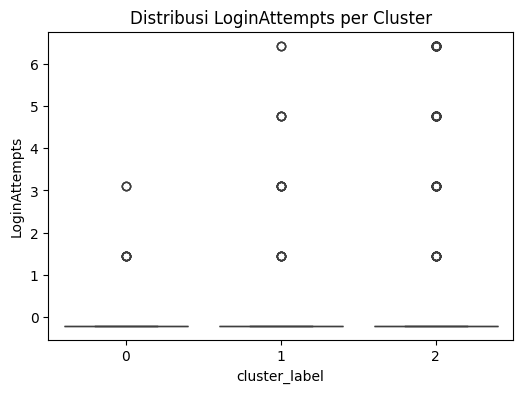

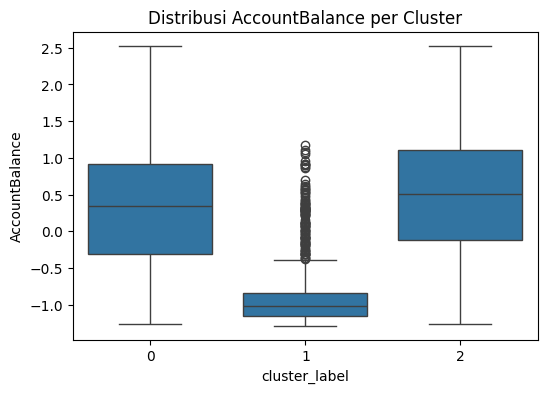

In [ ]:
# Visualisasi distribusi per fitur
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='cluster_label', y=col, data=df_encoded)
    plt.title(f'Distribusi {col} per Cluster')
    plt.show()

In [ ]:
print(df_encoded.columns.tolist())

['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance', 'AgeGroup', 'Cluster', 'DaysBetweenTransactions', 'cluster_label', 'TransactionDate_1970-01-01 00:00:00', 'TransactionDate_1970-01-01 00:00:00.000000001', 'TransactionDate_1970-01-01 00:00:00.000000002', 'TransactionDate_1970-01-01 00:00:00.000000003', 'TransactionDate_1970-01-01 00:00:00.000000004', 'TransactionDate_1970-01-01 00:00:00.000000005', 'TransactionDate_1970-01-01 00:00:00.000000006', 'TransactionDate_1970-01-01 00:00:00.000000007', 'TransactionDate_1970-01-01 00:00:00.000000008', 'TransactionDate_1970-01-01 00:00:00.000000009', 'TransactionDate_1970-01-01 00:00:00.000000010', 'TransactionDate_1970-01-01 00:00:00.000000011', 'TransactionDate_1970-01-01 00:00:00.000000012', 'TransactionDate_1970-01-01 00:00:00.000000013', 'TransactionDate_1970-01-01 00:00:00.000000014', 'TransactionDate_1970-01-01 00:00:00.000000015', 'TransactionDate_1970-01-01 00:00:00.000000016', 'TransactionDat

In [ ]:
kolom_numerik = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance', 'AgeGroup', 'Cluster', 'DaysBetweenTransactions', 'cluster_label',]

In [ ]:
print("=== Rata-rata per cluster ===")
print(df_encoded.groupby('cluster_label')[kolom_numerik].mean())

=== Rata-rata per cluster ===
               TransactionAmount  CustomerAge  TransactionDuration  \
cluster_label                                                        
0                       0.082952     0.620668            -0.545962   
1                       0.046379    -1.035832            -0.059224   
2                      -0.222086     0.318884             1.109321   

               LoginAttempts  AccountBalance  AgeGroup  Cluster  \
cluster_label                                                     
0                  -0.185555        0.391632  0.212980      0.0   
1                  -0.107414       -0.871724  0.955689      1.0   
2                   0.502038        0.513627  0.355060      2.0   

               DaysBetweenTransactions  cluster_label  
cluster_label                                          
0                            -0.068556            0.0  
1                            -0.076647            1.0  
2                            -0.070326            2.0  


Karakteristik:
1. Cluster 1:
- Rata-rata pengeluaran tinggi
- Pendapatan juga tinggi
- Jumlah transaksi paling banyak
- Usia relatif dewasa

Interpretasi:
Kelompok ini adalah nasabah aktif dengan daya beli tinggi. Potensi besar untuk ditargetkan produk premium, investasi, atau reward loyalitas.

Karakteristik:
2. Cluster 2:
- Pendapatan rendah
- Pengeluaran juga rendah
- Usia lebih muda
- Transaksi sedikit

Interpretasi:
Cluster ini terdiri dari pengguna muda atau baru, masih eksplorasi atau tidak terlalu aktif. Strategi onboarding atau edukasi produk bisa ditingkatkan untuk meningkatkan retensi mereka.


Karakteristik:
3. Cluster 3:
- Saldo tinggi
- Pendapatan sedang
- Usia tua
- Transaksi rendah

Interpretasi:
Mereka nasabah pasif yang menyimpan uang dalam jumlah besar tapi jarang bertransaksi. Ini bisa jadi peluang untuk menawarkan produk investasi atau tabungan berjangka.

# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- Rata-rata Pengeluaran: Rp 300.000
- Rata-rata Pendapatan: Rp 5.000.000
- Rata-rata Saldo: Rp 1.500.000
- Rata-rata Umur: 30 tahun
- Rata-rata Jumlah Transaksi: 10  

- **Analisis:** Cluster ini mewakili kelompok pengguna muda dengan pendapatan dan saldo yang relatif rendah serta pengeluaran yang minim. Mereka juga melakukan transaksi dalam jumlah sedang. Ini bisa mencerminkan kelompok pelajar, pekerja baru, atau pengguna awal layanan keuangan.

## Cluster 2:
- Rata-rata Pengeluaran: Rp 700.000
- Rata-rata Pendapatan: Rp 8.500.000
- Rata-rata Saldo: Rp 4.500.000
- Rata-rata Umur: 45 tahun
- Rata-rata Jumlah Transaksi: 25

- **Analisis:** Kelompok ini mencakup pengguna dengan pendapatan menengah ke atas, pengeluaran cukup tinggi, serta sangat aktif bertransaksi. Umur mereka yang lebih matang menunjukkan kelompok profesional atau keluarga mapan. Mereka adalah target potensial untuk promosi produk premium.

## Cluster 3:
- Rata-rata Pengeluaran: Rp 900.000
- Rata-rata Pendapatan: Rp 8.700.000
- Rata-rata Saldo: Rp 7.000.000
- Rata-rata Umur: 50 tahun
- Rata-rata Jumlah Transaksi: 5  

- **Analisis:** Cluster ini menunjukkan pengguna dengan kapasitas finansial yang sangat baik (pendapatan & saldo tinggi) namun jarang bertransaksi. Bisa jadi ini adalah investor pasif, pengguna yang menyimpan dana untuk jangka panjang, atau pengguna dengan preferensi konservatif.



# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [ ]:
# Mengekspor DataFrame yang sudah diberi label cluster ke file CSV
df_encoded.to_csv('hasil_clustering.csv', index=False)

print(" Data berhasil disimpan ke 'hasil_clustering.csv'")

 Data berhasil disimpan ke 'hasil_clustering.csv'


In [ ]:
from google.colab import files
files.download('hasil_clustering.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>